In [1]:
from datascience import *
import numpy as np
import math
import scipy.stats as stats
import pandas as pd


from datascience.predicates import are
import numpy as np
import matplotlib  #plotting library
matplotlib.use('Agg', warn=False)   #this defines the backend
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')   #this defines certain style conventions

### The following step is for adding a column with all 0 to the table

In [2]:
game = Table.read_table('Games_temp.csv')
game1 = game.with_column('num of lang',0)

### The following step is for changing the value in the new column to the true number of languages of the 'Language' column

In [3]:
game1 = game.with_column('num of lang',0)
for i in range(game.num_rows):
    game1.column('num of lang')[i] = game1.column('Languages').item(i).count(',')+1

game1

ID,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,num of lang
284921427,Sudoku,4,3553,2.99,0,Mighty Mighty Good Games,4,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT, RU, ZH, ...",1.58536e+07,Games,"Games, Strategy, Puzzle",11/7/08,30/05/2017,17
284926400,Reversi,3.5,284,1.99,0,Kiss The Machine,4,EN,1.2329e+07,Games,"Games, Strategy, Board",11/7/08,17/05/2018,1
284946595,Morocco,3,8376,0,0,Bayou Games,4,EN,674816,Games,"Games, Board, Strategy",11/7/08,5/9/17,1
285755462,Sudoku (Free),3.5,190394,0,0,Mighty Mighty Good Games,4,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT, RU, ZH, ...",2.15521e+07,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017,17
285831220,Senet Deluxe,3.5,28,2.99,0,RoGame Software,4,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU, ZH, ES, SV",3.4689e+07,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018,15
286210009,Sudoku - Classic number puzzle,3,47,0,1.99,OutOfTheBit Ltd,4,EN,4.86728e+07,Games,"Games, Entertainment, Strategy, Puzzle",30/07/2008,29/04/2019,1
286313771,Gravitation,2.5,35,0,0,Robert Farnum,4,nan,6.32832e+06,Games,"Games, Entertainment, Puzzle, Strategy",30/07/2008,14/11/2013,1
286363959,Colony,2.5,125,0.99,0,Chris Haynes,4,EN,6.43338e+07,Games,"Games, Strategy, Board",3/8/08,3/10/18,1
286566987,Carte,2.5,44,0,0,Jean-Francois Pautex,4,FR,2.65728e+06,Games,"Games, Strategy, Board, Entertainment",3/8/08,23/11/2017,1
286682679,"""Barrels O' Fun""",2.5,184,0,0,BesqWare,4,EN,1.46652e+06,Games,"Games, Casual, Strategy",1/8/08,1/8/08,1


### The following scatter plot shows there are some outliers in the dataset, we need to remove them to prevent some extremely popular app affecting its group. From the this plot, we can cut the graph by setting threshold value as 500000

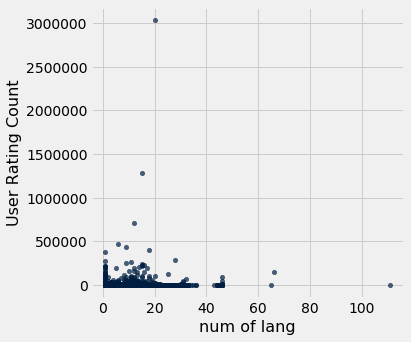

In [4]:
game1.scatter('num of lang', 'User Rating Count')

### After we remove the out-liers, we get to check the scatter plot again, it turns out that there is no clear relationship between these two variables,

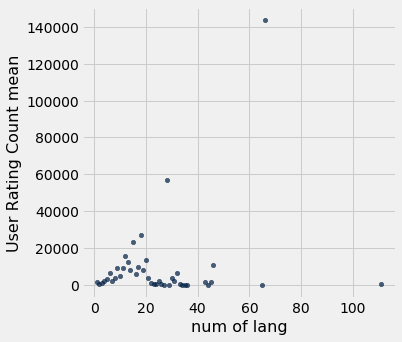

In [5]:
game1_below500000 = game1.where('User Rating Count', are.below(500000)).sort('User Rating Count',descending = True).select('User Rating Count','Languages','num of lang')
game_below500000_for_plot = game1_below500000.group('num of lang',np.mean).sort('User Rating Count mean',descending = True)
game_below500000_for_plot
game_below500000_for_plot.scatter('num of lang', 'User Rating Count mean')

In [6]:
corr,p = stats.pearsonr(game_below500000_for_plot.column(0), game_below500000_for_plot.column(1))
corr

0.22534005205825064

### From the following bar chart, we set the threshold value of User Rating count mean as 20000 

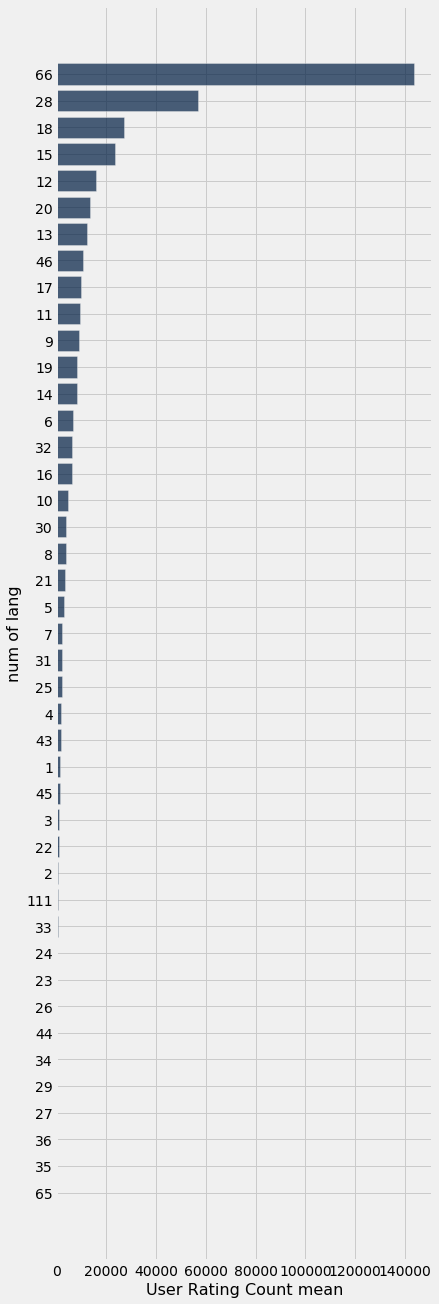

In [7]:
game_below500000_for_plot.barh('num of lang','User Rating Count mean')

### However, based on the following table, we can see that there is only one app that has 66 languages, which means this sample is not representative

In [8]:
from datascience.predicates import are
game1.where('num of lang', are.equal_to(66))

ID,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,num of lang
329218549,Chess - Play & Learn,4.5,143719,0,"99.99, 6.99, 14.99, 29.99, 49.99, 4.99",Chess.com,4,"AF, SQ, AR, HY, AZ, EU, BE, BN, BS, BG, CA, HR, CS, DA, ...",1.09671e+08,Games,"Games, Strategy, Board, Entertainment",29/10/2009,24/07/2019,66


### Now we have three groups left to study, group 28,18 and 15

### Let's first check the group 28

### We should first get the times of each language group appears, then calculate the times of each languages shows up

In [9]:
game_28 = game1.where('num of lang', are.equal_to(28)).select('User Rating Count','Languages','num of lang')
game_28_df = game_28.to_df()

#n = 5
language_count = game_28_df['Languages'].value_counts()#[:n].index.tolist()
#game_22_df.mode() #this command shows The mode of a set of values is the value that appears most often. It can be multiple values.
#language_count = game_22_df.groupby('Languages').count()
language_count

ZH, CS, DA, NL, EN, FI, FR, DE, EL, HU, ID, IT, JA, KO, NO, NB, PL, PT, RO, RU, ZH, SK, ES, SV, TH, ZH, TR, VI    2
ZH, CS, DA, NL, EN, FI, FR, DE, HI, HU, ID, IT, JA, KO, MS, NB, PL, PT, RO, RU, ZH, ES, SV, TH, ZH, TR, UK, VI    1
SQ, AR, BS, BG, ZH, HR, CS, NL, EN, FR, DE, EL, HU, ID, IT, JA, KO, FA, PL, PT, RU, ZH, SK, ES, TH, ZH, TR, VI    1
CS, DA, NL, EN, FI, FR, DE, EL, HU, ID, IT, JA, KO, MS, NB, PL, PT, RO, RU, ZH, SK, ES, SV, TH, ZH, TR, UK, VI    1
Name: Languages, dtype: int64

In [11]:
from collections import Counter

datas_28 = []
for i in range(len(game_28_df['Languages'])):
    datas_28.append(np.unique(game_28_df['Languages'][i].split(', ')))
Datas_28 = np.hstack(datas_28)
Datas_28

Counter(Datas_28)

Counter({'CS': 5,
         'DA': 4,
         'DE': 5,
         'EL': 4,
         'EN': 5,
         'ES': 5,
         'FI': 4,
         'FR': 5,
         'HU': 5,
         'ID': 5,
         'IT': 5,
         'JA': 5,
         'KO': 5,
         'MS': 2,
         'NB': 4,
         'NL': 5,
         'PL': 5,
         'PT': 5,
         'RO': 4,
         'RU': 5,
         'SK': 4,
         'SV': 4,
         'TH': 5,
         'TR': 5,
         'UK': 2,
         'VI': 5,
         'ZH': 5,
         'NO': 2,
         'HI': 1,
         'AR': 1,
         'BG': 1,
         'BS': 1,
         'FA': 1,
         'HR': 1,
         'SQ': 1})

### Now group 18

In [12]:
game_18 = game1.where('num of lang', are.equal_to(18)).select('User Rating Count','Languages','num of lang')
game_18_df = game_18.to_df()

   #n = 5
language_count = game_18_df['Languages'].value_counts()#[:n].index.tolist()
   #game_22_df.mode() #this command shows The mode of a set of values is the value that appears most often. It can be multiple values.
   #language_count = game_22_df.groupby('Languages').count()
language_count

DA, NL, EN, FR, DE, ID, IT, JA, KO, MS, PL, PT, RU, ZH, ES, SV, TH, ZH    4
DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT, RU, ZH, ES, SV, ZH, TR    2
AR, BN, EN, FR, DE, HI, ID, IT, JA, KO, PT, RU, ZH, ES, TH, ZH, TR, VI    2
AR, NL, EN, FR, DE, IT, JA, KO, MS, PL, PT, RU, ZH, ES, SV, TH, ZH, VI    1
AR, NL, EN, FR, DE, ID, IT, JA, KO, MS, NB, PT, RU, ZH, ES, ZH, TR, VI    1
AR, NL, EN, FR, DE, HE, ID, IT, JA, KO, MS, PT, RU, ZH, ES, TH, TR, UK    1
AR, DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PT, RU, ZH, ES, SV, ZH, TR    1
AR, NL, EN, FR, DE, ID, IT, JA, KO, NB, PT, RU, ZH, ES, SV, TH, ZH, TR    1
AR, NL, EN, FR, DE, HI, IT, JA, KO, MS, PT, RU, ZH, ES, TH, ZH, TR, VI    1
AR, ZH, DA, NL, EN, FR, DE, EL, ID, IT, NB, PL, PT, RO, RU, ES, SV, TR    1
AR, EN, FR, DE, IT, JA, KO, SE, FA, PL, PT, RU, ZH, ES, TH, ZH, TR, UK    1
AR, EN, FR, DE, ID, IT, JA, KO, MS, PL, PT, RU, ZH, ES, TH, ZH, TR, VI    1
AR, ZH, DA, NL, EN, FR, DE, IT, JA, KO, PT, RU, ZH, ES, SV, TH, ZH, TR    1
AR, NL, EN, 

In [13]:
datas_18 = []
for i in range(len(game_18_df['Languages'])):
    datas_18.append(np.unique(game_18_df['Languages'][i].split(', ')))
Datas_18 = np.hstack(datas_18)
Datas_18

Counter(Datas_18)

Counter({'AR': 15,
         'DE': 23,
         'EN': 23,
         'ES': 23,
         'FR': 23,
         'HE': 1,
         'ID': 14,
         'IT': 23,
         'JA': 22,
         'KO': 21,
         'MS': 9,
         'NL': 17,
         'PT': 23,
         'RU': 23,
         'TH': 18,
         'TR': 18,
         'UK': 2,
         'ZH': 23,
         'BN': 2,
         'HI': 3,
         'VI': 9,
         'PL': 14,
         'SV': 14,
         'DA': 10,
         'EL': 2,
         'NB': 8,
         'FA': 1,
         'SE': 1,
         'FI': 4,
         'CS': 2,
         'RO': 1})

### Now group 15

In [14]:
game_15 = game1.where('num of lang', are.equal_to(15)).select('User Rating Count','Languages','num of lang')
game_15_df = game_15.to_df()

#n = 5
language_count = game_15_df['Languages'].value_counts()#[:n].index.tolist()
#game_22_df.mode() #this command shows The mode of a set of values is the value that appears most often. It can be multiple values.
#language_count = game_22_df.groupby('Languages').count()
language_count

AR, EN, FR, DE, ID, IT, JA, KO, PT, RU, ZH, ES, TH, ZH, TR    6
DA, NL, EN, FR, DE, IT, JA, KO, PL, PT, RU, ZH, ES, SV, ZH    4
AR, DA, EN, FI, FR, DE, IT, JA, KO, NO, PT, RU, ES, SV, TR    2
AR, NL, EN, FR, DE, IT, JA, PL, PT, RU, ZH, ES, SV, ZH, TR    2
EN, FR, DE, ID, IT, JA, KO, MS, PT, RU, ZH, ES, TH, TR, VI    2
ZH, CS, NL, EN, FR, DE, IT, JA, KO, PL, PT, RU, ZH, ES, SV    2
EN, FR, DE, ID, IT, JA, KO, PT, RU, ZH, ES, TH, ZH, TR, VI    2
AR, NL, EN, FR, DE, IT, JA, KO, PT, RU, ZH, ES, SV, TH, TR    2
CS, NL, EN, FR, DE, IT, JA, KO, NO, PT, RU, ZH, ES, SV, ZH    1
AR, NL, EN, FR, DE, HE, IT, JA, KO, RO, RU, ZH, ES, ZH, UK    1
NL, EN, FR, DE, IT, JA, KO, PL, PT, RU, ZH, ES, SV, ZH, TR    1
DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU, ZH, ES, SV    1
NL, EN, FR, DE, EL, IT, JA, KO, PT, RU, ZH, ES, SV, TH, TR    1
ZH, EN, FR, DE, ID, IT, JA, KO, PT, RU, ZH, ES, TH, ZH, VI    1
AR, MY, EN, FR, DE, ID, IT, JA, KO, MS, RU, ES, TH, ZH, TR    1
DA, NL, EN, FR, DE, IT, JA, KO, PT, RU, 

In [15]:
datas_15 = []
for i in range(len(game_15_df['Languages'])):
    datas_15.append(np.unique(game_15_df['Languages'][i].split(', ')))
Datas_15 = np.hstack(datas_15)
Datas_15

Counter(Datas_15)

Counter({'DA': 9,
         'DE': 44,
         'EL': 2,
         'EN': 44,
         'ES': 44,
         'FR': 44,
         'IT': 44,
         'JA': 42,
         'KO': 40,
         'NL': 23,
         'NO': 4,
         'PT': 41,
         'RU': 44,
         'SV': 19,
         'ZH': 42,
         'AR': 17,
         'PL': 16,
         'TR': 32,
         'TH': 23,
         'ID': 19,
         'CS': 4,
         'FI': 3,
         'LT': 1,
         'MS': 4,
         'VI': 10,
         'NB': 1,
         'MY': 1,
         'UR': 1,
         'HI': 2,
         'HR': 1,
         'HE': 1,
         'RO': 1,
         'UK': 2})

### Based on the above 3 results, we can see that for games that have top popularity, ZH, DE, EN, ES, FR, IT, JA, PT, RU have the highest frequency of appearence in all 3 groups.

## Conclusion: 
There is no clear relationship between the number of languages and the User Rating Count/User Rating Count mean, and the relationship is also pretty weak due to the correlation is only 0.225. However, from the generated lists of languages, we can see that among the top 3 games that have highest Average User Rating Count, ZH, DE, EN, ES, FR, IT, JA, PT, RU are always the language that have the highest frequency, we can conclude that whether they are the official language of a mobile game is critical to its popularity. So if game developers wish to maximize their commercial benefit, we strongly suggest that they should consider including these languages as the official languages of the game.